# Problem Statement

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as war
war.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


# Data Profiling

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [3]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


## Exploritory Data Analysis

In [4]:
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [8]:
print(f'The number of rows in dataframe: {df.shape[0]}')
print(f"Unique number of Driver ID: {df['Driver_ID'].nunique()}")

The number of rows in dataframe: 19104
Unique number of Driver ID: 2381


In [9]:
# It shows there could be duplicate records for each driver ID. Lets do a doublec check on this. 

In [10]:
df_driver_summary = df.groupby(by=['Driver_ID'])['Income'].count().reset_index().rename(columns={'Income':'Count'})
df_driver_summary[df_driver_summary['Count'] > 1].sort_values(by=['Count'], ascending=False)

# Driver ID 569 has 24 records. Lets investigate further

,Driver_ID,Count
489,569,24
230,275,24
887,1043,24
2289,2684,24
788,926,24
...,...,...
1381,1624,2
1382,1625,2
1383,1626,2
354,419,2


In [11]:
df[df['Driver_ID'] == 569]

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3873,3873,01/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,200000,3
3874,3874,02/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1617630,3
3875,3875,03/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,2885720,3
3876,3876,04/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,155320,2
3877,3877,05/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,291010,2
3878,3878,06/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,147900,2
3879,3879,07/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,850000,4
3880,3880,08/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,912000,4
3881,3881,09/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1765000,4
3882,3882,10/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,172000,3


In [12]:
# Dropping the Unnamed column as it doesn't add any value here
df.drop(columns=['Unnamed: 0'],axis=1, inplace = True)

In [13]:
df[df['Driver_ID'] == 569]

# Data is on a monthly level hence, we need to aggregate it and also need to create a target column based on the LastworkingDate column

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
3873,01/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,200000,3
3874,02/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1617630,3
3875,03/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,2885720,3
3876,04/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,155320,2
3877,05/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,291010,2
3878,06/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,147900,2
3879,07/01/19,569,38.0,1.0,C26,0,111743,31/12/15,NaN,2,3,850000,4
3880,08/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,912000,4
3881,09/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,1765000,4
3882,10/01/19,569,39.0,1.0,C26,0,111743,31/12/15,NaN,2,3,172000,3


In [14]:
df_mod = df.groupby(["Driver_ID"]).aggregate({'MMM-YY':len,"Age":max,"City":np.unique,"Education_Level":max,"Income":np.mean,"Dateofjoining":np.unique,"Joining Designation":np.unique,
                                               "Grade": np.mean,"Total Business Value":sum, "Quarterly Rating":np.mean}).reset_index()

In [15]:
df_mod.head()

,Driver_ID,MMM-YY,Age,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.0
1,2,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.0
2,4,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.0
3,5,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.0
4,6,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.6


In [16]:
df_mod.rename(columns = {'MMM-YY':'Length_of_Service','Dateofjoining':'Date_of_Joining','Joining Designation':'Joining_Designation','Total Business Value': 'Total_Business_Value', 'Quarterly Rating': 'Quarterly_Rating'}, inplace= True)

In [17]:
print(f'The number of rows in dataframe: {df_mod.shape[0]}')
print(f"Unique number of Driver ID: {df_mod['Driver_ID'].nunique()}")

The number of rows in dataframe: 2381
Unique number of Driver ID: 2381


In [18]:
#Validation completed. Now lets add the target column for each driver ID

In [19]:
final_df = pd.merge(left = df.groupby(by=['Driver_ID'])['LastWorkingDate'].unique().apply(lambda x: x[-1]), right = df_mod,  on = "Driver_ID", how="outer")

In [20]:
final_df = pd.merge(left = df.groupby(by=['Driver_ID'])['Gender'].unique().apply(lambda x: x[-1]), right = final_df,  on = "Driver_ID", how="outer")

In [21]:
final_df

,Driver_ID,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,NaN,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000
2377,2785,1.0,28/10/20,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000
2378,2786,0.0,22/09/19,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667
2379,2787,1.0,20/06/19,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000


In [22]:
final_df['Gender'].value_counts()

0.0    1380
1.0     956
Name: Gender, dtype: int64

In [23]:
# Creating the Target Column

In [24]:
final_df['Churn'] = final_df['LastWorkingDate'].fillna(0)

In [25]:
def churn_label(df):
    if df == 0:
        return 0
    else: 
        return 1

In [26]:
final_df['Churn'] = final_df['Churn'].apply(churn_label)

In [27]:
final_df

,Driver_ID,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000,1
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000,0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000,1
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000,1
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,NaN,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000,0
2377,2785,1.0,28/10/20,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000,1
2378,2786,0.0,22/09/19,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667,1
2379,2787,1.0,20/06/19,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000,1


In [28]:
final_df['Churn'].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: Churn, dtype: float64

#### Churn Data
1. Roughly 68% of Drivers Churn 
2. 32% of Drivers are not Churn

Data is imbalanced

In [29]:
final_df.isnull().sum()

Driver_ID                 0
Gender                   45
LastWorkingDate         765
Length_of_Service         0
Age                       0
City                      0
Education_Level           0
Income                    0
Date_of_Joining           0
Joining_Designation       0
Grade                     0
Total_Business_Value      0
Quarterly_Rating          0
Churn                     0
dtype: int64

In [30]:
final_df

,Driver_ID,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn
0,1,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000,1
1,2,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000,0
2,4,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000,1
3,5,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000,1
4,6,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0.0,NaN,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000,0
2377,2785,1.0,28/10/20,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000,1
2378,2786,0.0,22/09/19,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667,1
2379,2787,1.0,20/06/19,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000,1


## Feature Engineering

Let us check those drivers who has a increase in Quaterly rating

In [31]:
def rating_increase(df):
    if len(df) >= 2:
        for i in range(len(df)):
            if df[-1] > df[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [32]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(rating_increase)
Quarterly_Rating_increased

Driver_ID
1       0
2       0
4       0
5       0
6       1
       ..
2784    1
2785    0
2786    0
2787    0
2788    0
Name: Quarterly Rating, Length: 2381, dtype: int64

In [33]:
final_df = pd.merge(left = Quarterly_Rating_increased,right = final_df,on = "Driver_ID",how="outer")


In [34]:
final_df.rename(columns = {'Quarterly Rating':'Quarterly_Rating_increased'}, inplace=True)

Let us check those drivers who has a increase in monthly income

In [35]:
def income_increase(df):
    if len(df) >= 2:
        for i in range(len(df)):
            if df[-1] > df[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [36]:
final_df = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(income_increase),right = final_df,on = "Driver_ID",how="outer")

In [37]:
final_df.rename(columns = {'Income_x':'Income_increased'}, inplace=True)

In [38]:
final_df['Income_increased'].value_counts()

0    2337
1      44
Name: Income_increased, dtype: int64

In [39]:
final_df

,Driver_ID,Income_increased,Quarterly_Rating_increased,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income_y,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn
0,1,0,0,0.0,03/11/19,3,28.0,C23,2,57387.0,24/12/18,1,1.0,1715580,2.000000,1
1,2,0,0,0.0,NaN,2,31.0,C7,2,67016.0,11/06/20,2,2.0,0,1.000000,0
2,4,0,0,0.0,27/04/20,5,43.0,C13,2,65603.0,12/07/19,2,2.0,350000,1.000000,1
3,5,0,0,0.0,03/07/19,3,29.0,C9,0,46368.0,01/09/19,1,1.0,120360,1.000000,1
4,6,0,1,1.0,NaN,5,31.0,C11,1,78728.0,31/07/20,3,3.0,1265000,1.600000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,0.0,NaN,24,34.0,C24,0,82815.0,15/10/15,2,3.0,21748820,2.625000,0
2377,2785,0,0,1.0,28/10/20,3,34.0,C9,0,12105.0,28/08/20,1,1.0,0,1.000000,1
2378,2786,0,0,0.0,22/09/19,9,45.0,C19,0,35370.0,31/07/18,2,2.0,2815090,1.666667,1
2379,2787,0,0,1.0,20/06/19,6,28.0,C20,2,69498.0,21/07/18,1,1.0,977830,1.500000,1


In [40]:
final_df['Date_of_Joining'] = pd.to_datetime(final_df['Date_of_Joining'])
final_df['LastWorkingDate'] = pd.to_datetime(final_df['LastWorkingDate'])


In [41]:

final_df['LastWorkingDate'] = final_df['LastWorkingDate'].fillna(pd.to_datetime('2021-06-01'))

In [42]:
final_df['Driver_tenure_days'] = (final_df['LastWorkingDate'] - final_df['Date_of_Joining'])

In [43]:
final_df

,Driver_ID,Income_increased,Quarterly_Rating_increased,Gender,LastWorkingDate,Length_of_Service,Age,City,Education_Level,Income_y,Date_of_Joining,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Driver_tenure_days
0,1,0,0,0.0,2019-03-11,3,28.0,C23,2,57387.0,2018-12-24,1,1.0,1715580,2.000000,1,77 days
1,2,0,0,0.0,2021-06-01,2,31.0,C7,2,67016.0,2020-11-06,2,2.0,0,1.000000,0,207 days
2,4,0,0,0.0,2020-04-27,5,43.0,C13,2,65603.0,2019-12-07,2,2.0,350000,1.000000,1,142 days
3,5,0,0,0.0,2019-03-07,3,29.0,C9,0,46368.0,2019-01-09,1,1.0,120360,1.000000,1,57 days
4,6,0,1,1.0,2021-06-01,5,31.0,C11,1,78728.0,2020-07-31,3,3.0,1265000,1.600000,0,305 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,0.0,2021-06-01,24,34.0,C24,0,82815.0,2015-10-15,2,3.0,21748820,2.625000,0,2056 days
2377,2785,0,0,1.0,2020-10-28,3,34.0,C9,0,12105.0,2020-08-28,1,1.0,0,1.000000,1,61 days
2378,2786,0,0,0.0,2019-09-22,9,45.0,C19,0,35370.0,2018-07-31,2,2.0,2815090,1.666667,1,418 days
2379,2787,0,0,1.0,2019-06-20,6,28.0,C20,2,69498.0,2018-07-21,1,1.0,977830,1.500000,1,334 days


In [44]:
final_df["Driver_tenure_days"] = final_df["Driver_tenure_days"].dt.days


In [45]:
final_df.drop(["LastWorkingDate","Date_of_Joining"],inplace=True,axis = 1)

In [46]:
final_df["Grade"] = np.round(final_df["Grade"])

In [47]:
final_df["Quarterly_Rating"]= final_df["Quarterly_Rating"].round()

In [58]:
final_df.rename(columns = {'Income_y': 'Income'}, inplace =True)

# Analysis on Final DF

1    1616
0     765
Name: Churn, dtype: int64


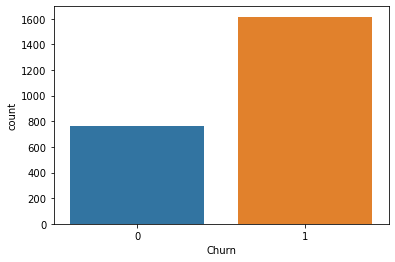

In [49]:
sns.countplot(final_df['Churn'])

print(final_df['Churn'].value_counts())

In [53]:
final_df

,Driver_ID,Income_increased,Quarterly_Rating_increased,Gender,Length_of_Service,Age,City,Education_Level,Income_y,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Driver_tenure_days
0,1,0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.0,1,77
1,2,0,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.0,0,207
2,4,0,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.0,1,142
3,5,0,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.0,1,57
4,6,0,1,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,2.0,0,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,3.0,0,2056
2377,2785,0,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.0,1,61
2378,2786,0,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,2.0,1,418
2379,2787,0,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,2.0,1,334


In [91]:
def plot_histogram(df, hue = None):
    """ To Plot the histogram of the continuous feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    sns.displot(x = df, hue = hue, kind='kde', color='red')
    plt.title(f'Datapoint distribution of {df.name}')
    


def plot_countplot(df, n=100, hue = None ):
    """ To plot bargraph to get the count of each score feature"""
    print(df.describe())
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution of {df.name}')
    sns.countplot(df, hue = hue,  order=pd.value_counts(df).iloc[:n].index)


def plot_boxplot(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.boxplot(x,y)


def plot_scatter(x,y):
    """ To plot boxplot to get the distribution between target variable and other feature"""
    plt.figure(figsize=(10,6))
    plt.title(f'Datapoint distribution between {x.name} and {y.name}')
    sns.scatterplot(x,y,color='green')


def plot_heatmap(df,x=10,y=6):
    """To plot the correaltion matrix to understand which feature is more related to target variable"""
    plt.figure(figsize=(x,y))
    plt.title(f'Correlation Matrix')
    sns.heatmap(df.corr(),annot=True)

count    2381.000000
mean       33.663167
std         5.983375
min        21.000000
25%        29.000000
50%        33.000000
75%        37.000000
max        58.000000
Name: Age, dtype: float64


<Figure size 720x432 with 0 Axes>

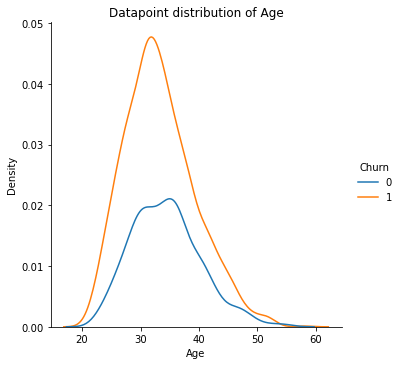

In [87]:
plot_histogram(final_df['Age'], hue = final_df['Churn'])

count      2381.000000
mean      59232.460484
std       28298.214012
min       10747.000000
25%       39104.000000
50%       55285.000000
75%       75835.000000
max      188418.000000
Name: Income, dtype: float64


<Figure size 720x432 with 0 Axes>

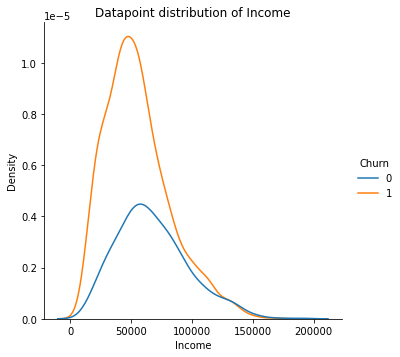

In [89]:
plot_histogram(final_df['Income'], hue=final_df['Churn'])

In [90]:
final_df

,Driver_ID,Income_increased,Quarterly_Rating_increased,Gender,Length_of_Service,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Driver_tenure_days
0,1,0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.0,1,77
1,2,0,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.0,0,207
2,4,0,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.0,1,142
3,5,0,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.0,1,57
4,6,0,1,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,2.0,0,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,3.0,0,2056
2377,2785,0,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.0,1,61
2378,2786,0,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,2.0,1,418
2379,2787,0,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,2.0,1,334


count    2336.000000
mean        0.409247
std         0.491800
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Gender, dtype: float64


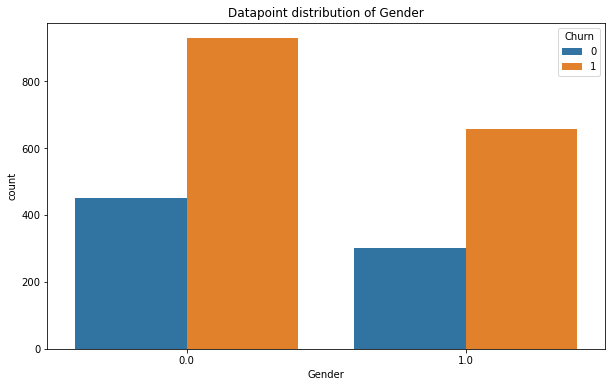

In [93]:
plot_countplot(final_df['Gender'], hue=final_df['Churn'])

count    2381.00000
mean        1.00756
std         0.81629
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max         2.00000
Name: Education_Level, dtype: float64


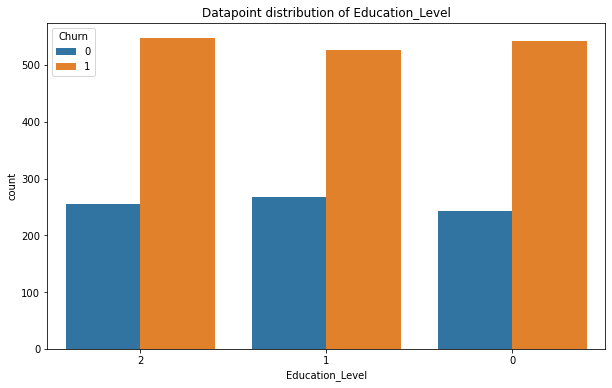

In [95]:
plot_countplot(final_df['Education_Level'], hue=final_df['Churn'])

count    2381.000000
mean        0.018480
std         0.134706
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Income_increased, dtype: float64


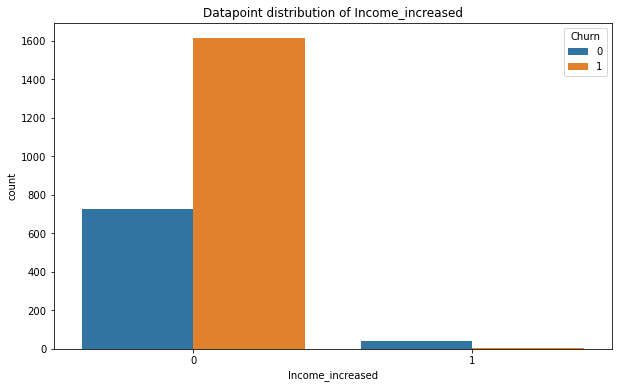

In [96]:
plot_countplot(final_df['Income_increased'], hue=final_df['Churn'])

In [97]:
#This proves to be a good catch. When there is no increase in income Churn is very high

count    2381.000000
mean        0.228895
std         0.420210
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Quarterly_Rating_increased, dtype: float64


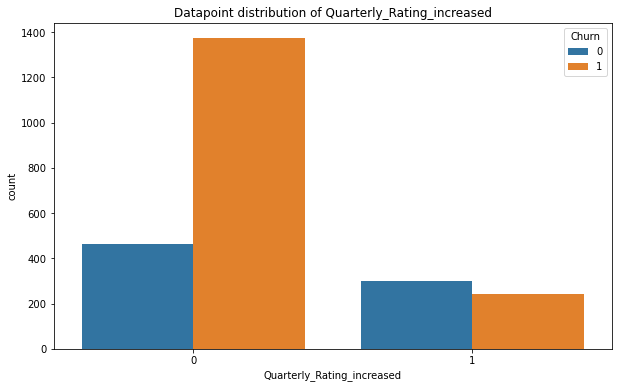

In [98]:
plot_countplot(final_df['Quarterly_Rating_increased'], hue=final_df['Churn'])

In [99]:
##This also proves to be a good catch. When there is no increase in rating, Churn is very high

count     2381
unique      29
top        C20
freq       152
Name: City, dtype: object


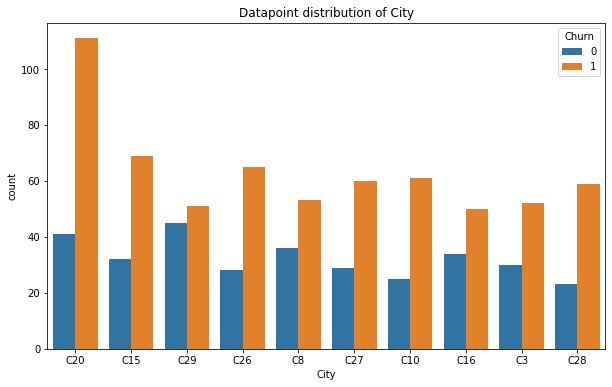

In [101]:
plot_countplot(final_df['City'], n = 10, hue=final_df['Churn'])

In [102]:
#City: C20,C15,C29 ae some of the top cities with higher curn rate.

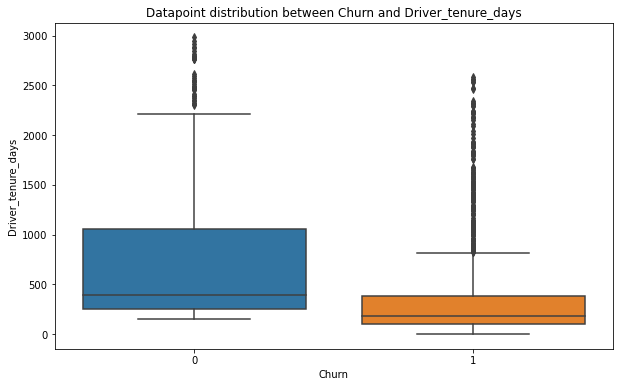

In [103]:
plot_boxplot(x = final_df['Churn'], y= final_df['Driver_tenure_days'])

In [104]:
# The Median churn rate for drivers are within 100 days of joining.

count    2.381000e+03
mean     4.586742e+06
std      9.127115e+06
min     -1.385530e+06
25%      0.000000e+00
50%      8.176800e+05
75%      4.173650e+06
max      9.533106e+07
Name: Total_Business_Value, dtype: float64


<Figure size 720x432 with 0 Axes>

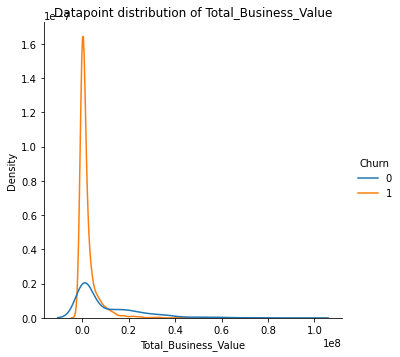

In [106]:
plot_histogram(final_df['Total_Business_Value'], hue=final_df['Churn'])

count    2381.000000
mean        1.820244
std         0.841433
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Joining_Designation, dtype: float64


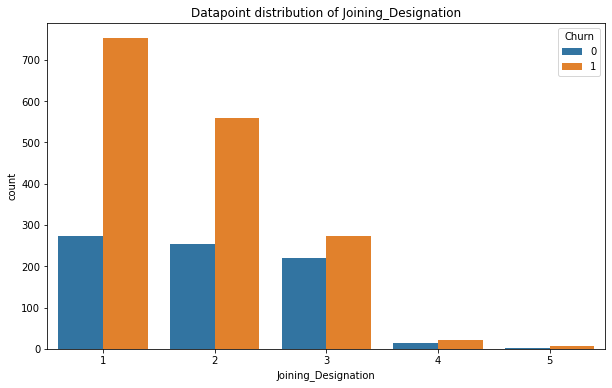

In [107]:
plot_countplot(final_df['Joining_Designation'], n = 10, hue=final_df['Churn'])

count    2381.000000
mean        2.078538
std         0.931321
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Grade, dtype: float64


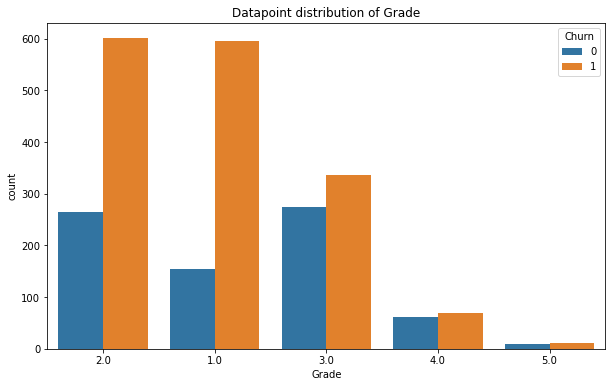

In [109]:
plot_countplot(final_df['Grade'], n = 10, hue=final_df['Churn'])

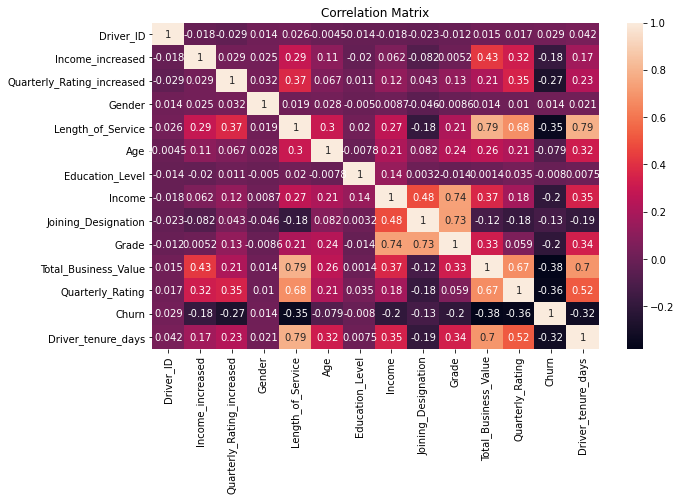

In [110]:
plot_heatmap(final_df)

### Checking for Null Values

In [111]:
final_df.isnull().sum()

Driver_ID                      0
Income_increased               0
Quarterly_Rating_increased     0
Gender                        45
Length_of_Service              0
Age                            0
City                           0
Education_Level                0
Income                         0
Joining_Designation            0
Grade                          0
Total_Business_Value           0
Quarterly_Rating               0
Churn                          0
Driver_tenure_days             0
dtype: int64

### SimpleImputer

In [112]:
from sklearn.impute import SimpleImputer

In [113]:
imputer = SimpleImputer(strategy='most_frequent')
final_df["Gender"] = imputer.fit_transform(X=final_df["Gender"].values.reshape(-1,1),y=final_df["Churn"].values.reshape(-1,1))

In [114]:
final_df

,Driver_ID,Income_increased,Quarterly_Rating_increased,Gender,Length_of_Service,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Driver_tenure_days
0,1,0,0,0.0,3,28.0,C23,2,57387.0,1,1.0,1715580,2.0,1,77
1,2,0,0,0.0,2,31.0,C7,2,67016.0,2,2.0,0,1.0,0,207
2,4,0,0,0.0,5,43.0,C13,2,65603.0,2,2.0,350000,1.0,1,142
3,5,0,0,0.0,3,29.0,C9,0,46368.0,1,1.0,120360,1.0,1,57
4,6,0,1,1.0,5,31.0,C11,1,78728.0,3,3.0,1265000,2.0,0,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,0.0,24,34.0,C24,0,82815.0,2,3.0,21748820,3.0,0,2056
2377,2785,0,0,1.0,3,34.0,C9,0,12105.0,1,1.0,0,1.0,1,61
2378,2786,0,0,0.0,9,45.0,C19,0,35370.0,2,2.0,2815090,2.0,1,418
2379,2787,0,0,1.0,6,28.0,C20,2,69498.0,1,1.0,977830,2.0,1,334


In [115]:
final_df.isnull().sum()

Driver_ID                     0
Income_increased              0
Quarterly_Rating_increased    0
Gender                        0
Length_of_Service             0
Age                           0
City                          0
Education_Level               0
Income                        0
Joining_Designation           0
Grade                         0
Total_Business_Value          0
Quarterly_Rating              0
Churn                         0
Driver_tenure_days            0
dtype: int64

### TargetEncoder

In [122]:
from category_encoders import TargetEncoder

In [125]:
te  = TargetEncoder()

In [126]:
final_df["City"] = te.fit_transform(X = final_df["City"],y = final_df["Churn"])

In [127]:
final_df

,Driver_ID,Income_increased,Quarterly_Rating_increased,Gender,Length_of_Service,Age,City,Education_Level,Income,Joining_Designation,Grade,Total_Business_Value,Quarterly_Rating,Churn,Driver_tenure_days
0,1,0,0,0.0,3,28.0,0.770270,2,57387.0,1,1.0,1715580,2.0,1,77
1,2,0,0,0.0,2,31.0,0.684211,2,67016.0,2,2.0,0,1.0,0,207
2,4,0,0,0.0,5,43.0,0.816901,2,65603.0,2,2.0,350000,1.0,1,142
3,5,0,0,0.0,3,29.0,0.706667,0,46368.0,1,1.0,120360,1.0,1,57
4,6,0,1,1.0,5,31.0,0.703125,1,78728.0,3,3.0,1265000,2.0,0,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,0,1,0.0,24,34.0,0.698630,0,82815.0,2,3.0,21748820,3.0,0,2056
2377,2785,0,0,1.0,3,34.0,0.706667,0,12105.0,1,1.0,0,1.0,1,61
2378,2786,0,0,0.0,9,45.0,0.569444,0,35370.0,2,2.0,2815090,2.0,1,418
2379,2787,0,0,1.0,6,28.0,0.730263,2,69498.0,1,1.0,977830,2.0,1,334
